In [ ]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 6947352507812970401
xla_global_id: -1
]


In [ ]:
import tensorflow as tf
print(tf.__version__)

2.19.0


In [ ]:
import pandas as pd
from PIL import Image
import os
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter, defaultdict
from tqdm.auto import tqdm
import cv2
import numpy as np
import json

In [ ]:
file_path = 'drive/MyDrive/ScrapedWikiArtImages/img/full'
sample_files = os.listdir(file_path)[:5]
sample_files

['bb2eb0196b361473ca716a544a998b8c0d2b72bc.jpg',
 '10cc94d490eda71106e915e3c91d001b80d796d3.jpg',
 'd646554838980b9e27dbfdc08e1a7223a4ff9432.jpg',
 'b75d749633c9a5bfd8cd5d253d9b42bad715ebb8.jpg',
 'c8478202da9f21a77e3d3d1935dd10e824a471ee.jpg']

In [ ]:
num_files = len([f for f in os.listdir(file_path) if os.path.isfile(os.path.join(file_path, f))])
print(f"Number of files: {num_files}")

Number of files: 47344


In [ ]:
with open('drive/MyDrive/ScrapedWikiArtImages/canvas_metadata.json', 'r', encoding='utf-8') as f:
    try:
        metadata_list = json.load(f)
        df = pd.DataFrame(metadata_list)
        print(f'Metadata file shape:\n{df.shape}')
        print(f'Columns:\n{list(df.columns)}')
        df.head()
    except json.JSONDecodeError as e:
        print(f"Error al decodificar JSON: {e}")
        # Attempt to locate and display the problematic line
        error_line = e.lineno
        error_col = e.colno
        print(f"El error se encuentra en la línea {error_line}, columna {error_col}.")

        try:
            # Reopen the file to read lines, as the previous 'f' might be exhausted
            with open('drive/MyDrive/ScrapedWikiArtImages/canvas_metadata.json', 'r', encoding='utf-8') as f_read_lines:
                lines = f_read_lines.readlines()
                if 0 < error_line <= len(lines):
                    problematic_line = lines[error_line - 1]
                    print(f"\nContenido de la línea {error_line} (aproximado):\n")
                    print(problematic_line.strip())
                    # Highlight the character if possible
                    if 0 < error_col <= len(problematic_line):
                        print(" " * (error_col - 1) + "^")
                        print("El caracter problemático está indicado por el '^' arriba.")
                    else:
                        print(f"No se pudo resaltar el caracter en la columna {error_col} de la línea {error_line}.")
                else:
                    print(f"No se pudo leer la línea {error_line} del archivo.")
        except Exception as read_error:
            print(f"Error al intentar leer el archivo línea por línea: {read_error}")

Error al decodificar JSON: Expecting ',' delimiter: line 47910 column 888 (char 48875120)
El error se encuentra en la línea 47910, columna 888.

Contenido de la línea 47910 (aproximado):

{"Id": 47906, "URL": "https://www.wikiart.org/en/gosta-adrian-nilsson/gul-figur-1917", "Title": "Gul figur", "OriginalTitle": null, "Author": "Gosta Adrian-Nilsson", "AuthorLink": "wikiart.org/en/gosta-adrian-nilsson", "Date": "1917", "Styles": [["Cubo-Futurism", "wikiart.org/en/paintings-by-style/cubo-futurism"]], "Series": null, "SeriesLink": null, "Genre": "abstract", "GenreLink": "wikiart.org/en/paintings-by-genre/abstract", "Media": [], "Location": null, "Dimensions": null, "Description": null, "WikiDescription": null, "WikiLink": null, "Tags": [], "image_urls": ["https://uploads5.wikiart.org/images/gosta-adrian-nilsson/gul-figur-1917.jpg"], "images": [{"url": "https://uploads5.wikiart.org/images/gosta-adrian-nilsson/gul-figur-1917.jpg", "path": "full/b49a6d2cd49d9ae608ce9aae8573bc6d47470599.jpg"

In [ ]:
num_files = len([f for f in os.listdir(file_path) if os.path.isfile(os.path.join(file_path, f))])
print(f"Number of files: {num_files}")

Number of files: 47344


In [ ]:
image_directory_path = 'drive/MyDrive/ScrapedWikiArtImages/img/full'

In [ ]:
def get_image_mode(filepath):
    """
    Opens an image and returns its mode (e.g., 'RGB', 'RGBA', 'L', 'P').
    Returns specific strings for errors.
    """
    try:
        with Image.open(filepath) as img:
            # Ensure the image data is loaded to catch potential decoding errors
            img.load()
            return img.mode
    except FileNotFoundError:
        # This shouldn't happen if os.path.isfile is checked first, but good failsafe
        return 'File Not Found'
    except IsADirectoryError:
         # This also shouldn't happen with os.path.isfile check
         return 'Is Directory'
    except Exception as e:
        # Keep minimal error print for problematic files
        return 'Read Error' # Return specific string

In [ ]:
image_modes = []
problematic_files = 0
file_names = []
skipped_non_files = 0

Reading filenames from directory: drive/MyDrive/ScrapedWikiArtImages/img/full
Found 47344 entries.
Processing images from directory: 'drive/MyDrive/ScrapedWikiArtImages/img/full' to check color modes...


Processing images:   0%|          | 0/47344 [00:00<?, ?file/s]


Finished processing directory entries.

--- Image Color Mode Analysis Results ---
Total directory entries scanned: 47344
Entries skipped (not files): 0
Number of potential image files processed: 47344
Number of problematic image files (read error/etc.): 0

Distribution of detected image modes:
Mode  Count  Percentage (%)
 RGB  47344           100.0


/tmp/ipython-input-954815440.py:72: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Mode', y='Count', data=plot_df, order=plot_df['Mode'], palette='viridis')


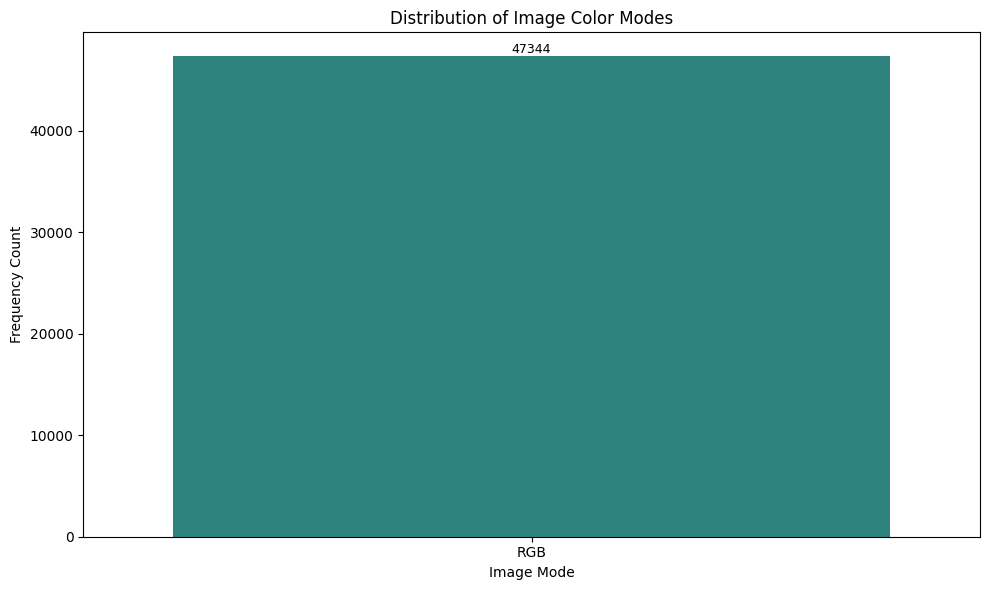

In [ ]:
# Get list of files directly from the directory
try:
    print(f"Reading filenames from directory: {image_directory_path}")
    file_names = os.listdir(image_directory_path)
    print(f"Found {len(file_names)} entries.")
except FileNotFoundError:
    print(f"Error: Directory not found at {image_directory_path}. Please check the path.")
    file_names = [] # Ensure file_names is empty list if directory not found
except Exception as e:
    print(f"Error reading directory {image_directory_path}: {e}")
    file_names = []

if not file_names:
    print("No files found or directory could not be read. Exiting.")
else:
    print(f"Processing images from directory: '{image_directory_path}' to check color modes...")
    total_entries = len(file_names)

    # --- Use tqdm for progress bar ---
    for filename in tqdm(file_names, desc="Processing images", unit="file"):
        image_path = os.path.join(image_directory_path, filename)

        # Check if it's actually a file (and not a subdirectory) before processing
        if os.path.isfile(image_path):
            mode = get_image_mode(image_path)
            image_modes.append(mode)
            if mode in ['File Not Found', 'Read Error', 'Is Directory']:
                 problematic_files += 1
        else:
             image_modes.append('Skipped (Not a File)')
             skipped_non_files += 1

    print(f"\nFinished processing directory entries.")


        # --- Analyze and Report Modes ---
    if image_modes:
        mode_counts = Counter(image_modes)

        # Calculate total valid images processed (excluding skipped non-files)
        valid_entries_processed = total_entries - skipped_non_files

        print("\n--- Image Color Mode Analysis Results ---")
        print(f"Total directory entries scanned: {total_entries}")
        print(f"Entries skipped (not files): {skipped_non_files}")
        print(f"Number of potential image files processed: {valid_entries_processed}")

        num_read_errors = mode_counts.get('Read Error', 0)
        num_file_not_found = mode_counts.get('File Not Found', 0) # Should be 0 if isfile check works
        num_is_directory = mode_counts.get('Is Directory', 0) # Should be 0 if isfile check works
        total_problematic = num_read_errors + num_file_not_found + num_is_directory
        print(f"Number of problematic image files (read error/etc.): {total_problematic}")


        print("\nDistribution of detected image modes:")
        # Create a DataFrame for better display
        mode_df = pd.DataFrame(mode_counts.items(), columns=['Mode', 'Count'])
        # Calculate percentage based on valid entries processed (potential images)
        mode_df['Percentage (%)'] = (mode_df['Count'] / valid_entries_processed) * 100 if valid_entries_processed > 0 else 0
        # Filter out skipped non-files before displaying final mode distribution
        display_df = mode_df[mode_df['Mode'] != 'Skipped (Not a File)'].copy()
        display_df = display_df.sort_values(by='Count', ascending=False)
        print(display_df.to_string(index=False))

        # --- Plotting ---
        # Filter out error/skipped categories for plotting main modes
        plot_df = display_df[~display_df['Mode'].isin(['File Not Found', 'Read Error', 'Is Directory'])].copy()

        if not plot_df.empty:
            plt.figure(figsize=(10, 6))
            # Use plot_df which contains only the modes we want to plot
            sns.barplot(x='Mode', y='Count', data=plot_df, order=plot_df['Mode'], palette='viridis')
            plt.title('Distribution of Image Color Modes')
            plt.xlabel('Image Mode')
            plt.ylabel('Frequency Count')
            # Add text labels for counts on bars
            max_count = plot_df['Count'].max() # Get max count for positioning labels
            for bar in plt.gca().patches: # Get bars from the plot axes
                 plt.text(bar.get_x() + bar.get_width() / 2, # x position (center of bar)
                          bar.get_height(), # y position (top of bar)
                          f'{int(bar.get_height())}', # Text label (count)
                          ha='center', color='black', va='bottom', # Alignment
                          fontsize=9) # Adjust font size if needed
            # Adjust y-axis limit to make space for labels
            plt.ylim(0, max_count * 1.05)
            plt.tight_layout()
            plt.show()
        else:
            print("\nNo valid image modes found to plot (only errors or skipped entries).")

    else:
        print("\nNo image modes were collected. Check directory path and contents.")

In [ ]:
def get_image_stats(filepath):
    """
    Opens an image and returns its width, height, file size (bytes),
    and Laplacian variance (blurriness score).
    Includes filename in the return dictionary for tracking.
    """
    filename = os.path.basename(filepath) # Get filename for the result dict
    width, height, file_size, laplacian_var = None, None, None, None
    error_msg = None

    try:
        # Get file size first (less likely to fail than image loading)
        if os.path.exists(filepath):
            file_size = os.path.getsize(filepath)
        else:
            error_msg = 'File Not Found'
            # Return early if file not found
            return {'filename': filename, 'width': width, 'height': height, 'file_size_bytes': file_size, 'laplacian_variance': laplacian_var, 'error': error_msg}

        # Open with PIL to get dimensions
        with Image.open(filepath) as img_pil:
            width, height = img_pil.size

        # Read with OpenCV for Laplacian calculation (grayscale)
        img_cv2 = cv2.imread(filepath, cv2.IMREAD_GRAYSCALE)

        if img_cv2 is None:
            laplacian_var = None # Indicate blur check failed
            # error_msg = 'OpenCV Read Error' # Optionally flag OpenCV errors specifically
        else:
            # Calculate Laplacian variance
            laplacian_var = cv2.Laplacian(img_cv2, cv2.CV_64F).var()

    except FileNotFoundError:
        error_msg = 'File Not Found' # Should be caught by os.path.exists, but as failsafe
    except IsADirectoryError:
        error_msg = 'Is Directory' # Should be caught by os.path.isfile, but as failsafe
    except Exception as e:
        # Catch other potential errors (PIL/OpenCV read errors, permissions, corrupt file etc.)
        error_msg = f'Processing Error: {type(e).__name__}' # Include error type

    # Return results as a dictionary
    return {
        'filename': filename,
        'width': width,
        'height': height,
        'file_size_bytes': file_size,
        'laplacian_variance': laplacian_var,
        'error': error_msg
    }

Reading filenames from directory: drive/MyDrive/ScrapedWikiArtImages/img/full
Found 47344 entries. Filtering for files...


Filtering files:   0%|          | 0/47344 [00:00<?, ?entry/s]

Found 47344 files to analyze.
Analyzing 47344 images sequentially...


Analyzing images:   0%|          | 0/47344 [00:00<?, ?file/s]


Finished analyzing files.

--- Image Quality & Resolution Analysis Results ---
Total directory entries scanned: 47344
Entries skipped (not files): 0
Number of potential image files processed: 47344
Number of problematic image files (read/processing error): 0

--- Descriptive Statistics for Valid Images (where processing succeeded) ---
              width        height   total_pixels  file_size_bytes  \
count  47344.000000  47344.000000   47344.000000     4.734400e+04   
mean     546.906767    530.951103  289378.073251     6.781429e+04   
std      149.791649     89.563589   88718.927083     5.081341e+04   
min       47.000000     50.000000    9984.000000     2.447000e+03   
25%      432.000000    480.000000  234000.000000     3.829100e+04   
50%      500.000000    577.000000  280800.000000     5.567900e+04   
75%      732.000000    600.000000  362250.000000     8.086625e+04   
max      750.000000    842.000000  589400.000000     1.110766e+06   

       laplacian_variance  
count       

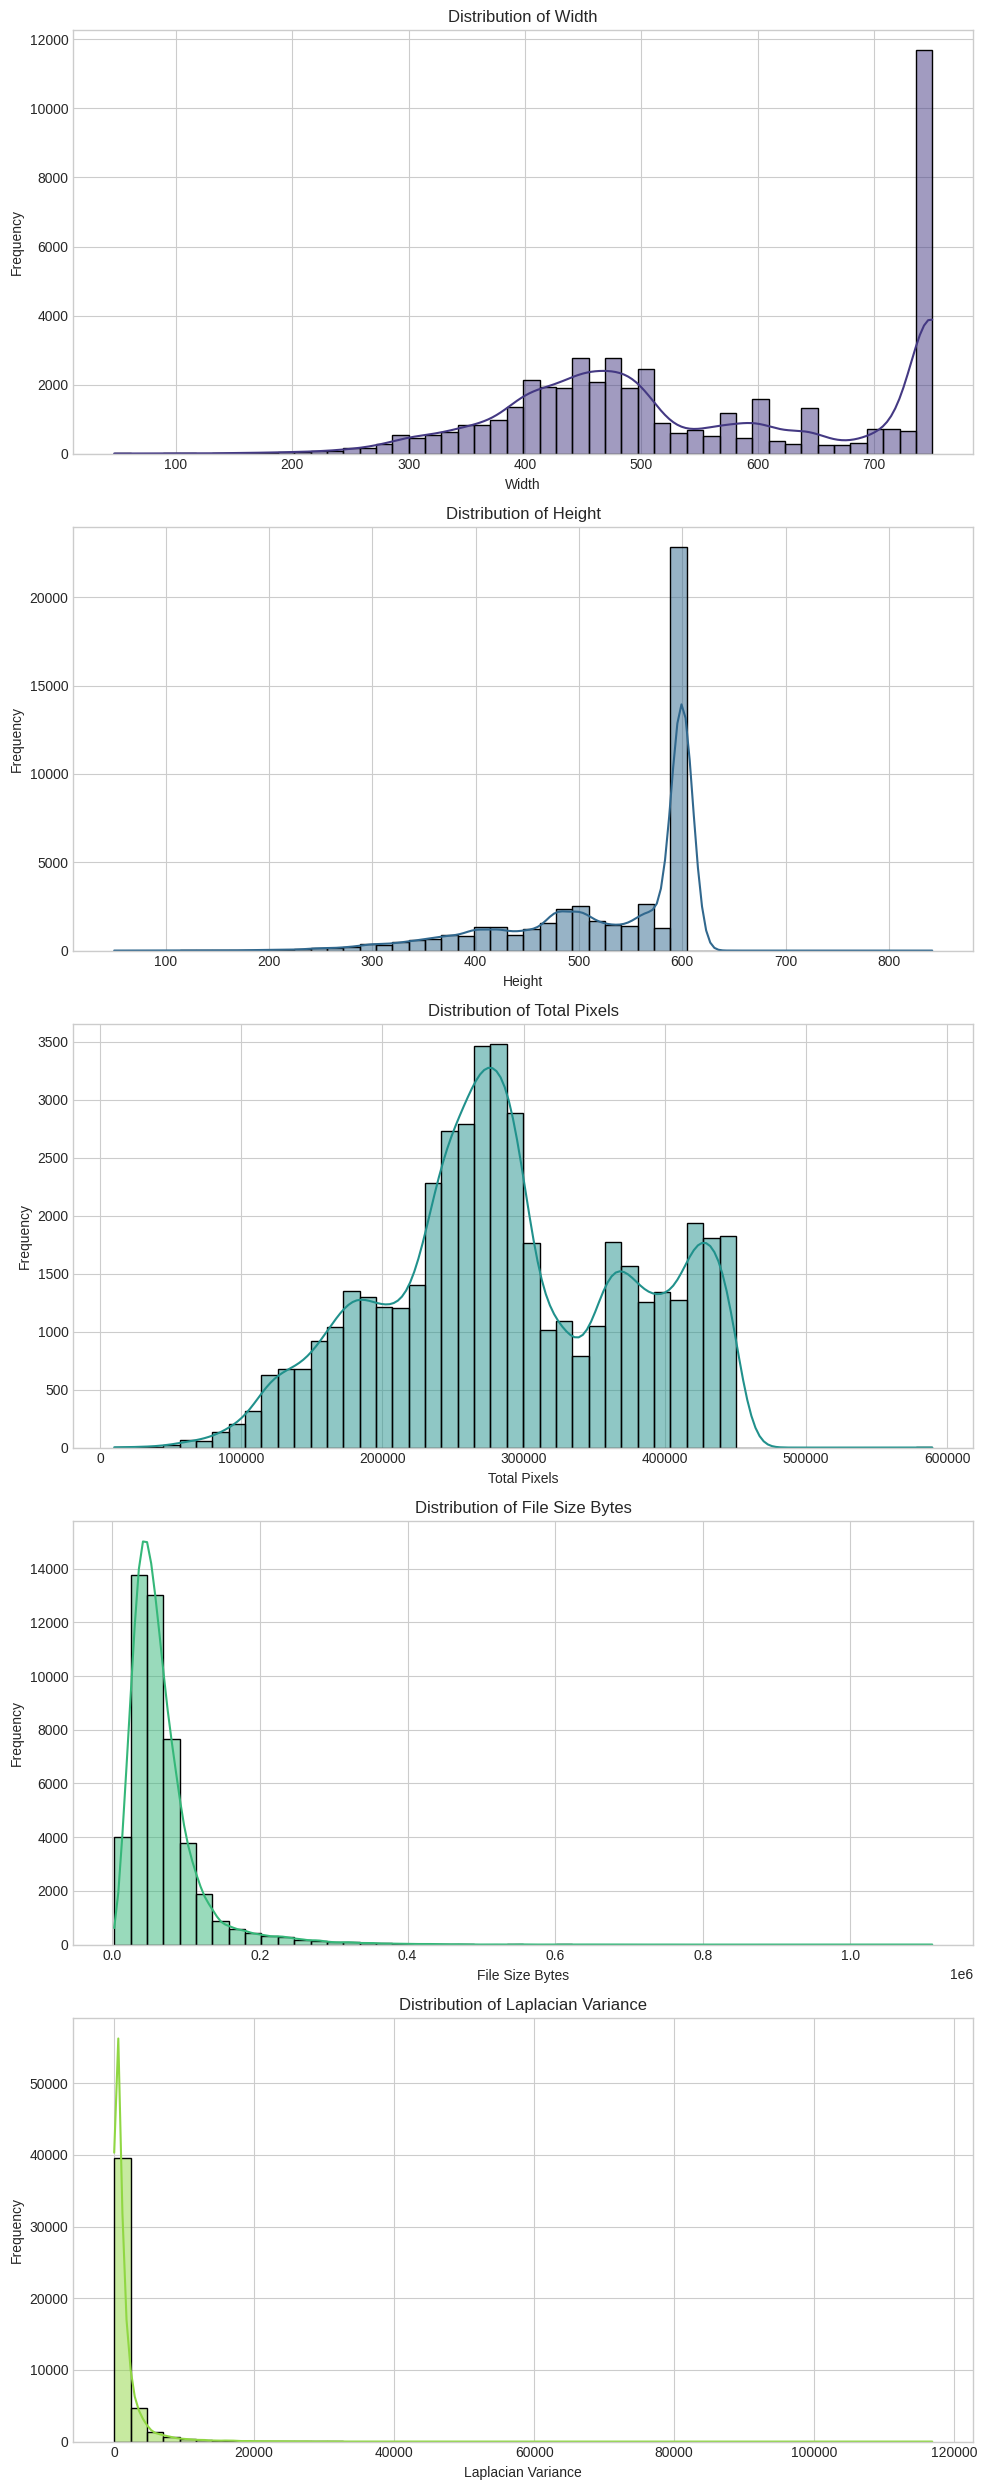


--- Potential Outlier Analysis ---
Found 3046 images with Laplacian Variance < 100 (potential blur).
Examples of potentially blurry image filenames:
                                         filename  laplacian_variance
15   b46833f30e0f8ccbc3977446eb1e7c52348e00dc.jpg           31.341434
37   a3dc3a809a0fa978abe3951ff6a3163fb4942aed.jpg           65.126312
47   670bedf8655df2015638b3b39526c241c7415f53.jpg           55.455201
102  b09fc0d87ff1beb635a62b79f966d63de0887e98.jpg           91.710983
119  d51fb8ea836dc4777ada32d5dbf8a7a1fd143303.jpg           46.953538

Found 15321 images with Total Pixels < 250000 (potential low resolution).
Examples of potentially low-resolution image filenames:
                                       filename  width  height  total_pixels
2  d646554838980b9e27dbfdc08e1a7223a4ff9432.jpg    341     512        174592
3  b75d749633c9a5bfd8cd5d253d9b42bad715ebb8.jpg    341     512        174592
5  01a842cede1f52a881d4a93c8caeaf75519fa983.jpg    321     476      

In [ ]:
file_paths_to_process = []
skipped_non_files = 0
total_entries = 0

try:
    print(f"Reading filenames from directory: {image_directory_path}")
    all_entries = os.listdir(image_directory_path)
    total_entries = len(all_entries)
    print(f"Found {total_entries} entries. Filtering for files...")

    # Filter for actual files first
    for filename in tqdm(all_entries, desc="Filtering files", unit="entry"):
        full_path = os.path.join(image_directory_path, filename)
        if os.path.isfile(full_path):
            file_paths_to_process.append(full_path)
        else:
            skipped_non_files += 1
    print(f"Found {len(file_paths_to_process)} files to analyze.")

except FileNotFoundError:
    print(f"Error: Directory not found at {image_directory_path}. Please check the path.")
    file_paths_to_process = []
except Exception as e:
    print(f"Error reading directory {image_directory_path}: {e}")
    file_paths_to_process = []


# --- Process Images using Single Thread ---
analysis_results = []

if not file_paths_to_process:
    print("No valid image files found to process. Exiting.")
else:
    print(f"Analyzing {len(file_paths_to_process)} images sequentially...")

    # --- Reverted to single-threaded loop with tqdm ---
    for image_path in tqdm(file_paths_to_process, desc="Analyzing images", unit="file"):
        result = get_image_stats(image_path)
        analysis_results.append(result)
        # Note: Problematic file count is handled during analysis phase now

    print(f"\nFinished analyzing files.")


    # --- Analyze and Report Results ---
    if analysis_results:
        results_df = pd.DataFrame(analysis_results)

        # Calculate total pixels (resolution) - handle potential None values in width/height
        results_df['total_pixels'] = pd.to_numeric(results_df['width'], errors='coerce') * pd.to_numeric(results_df['height'], errors='coerce')

        # Separate problematic entries based on the 'error' column
        valid_df = results_df[results_df['error'].isna()].copy()
        error_df = results_df[results_df['error'].notna()].copy() # Contains rows with specific error strings

        print("\n--- Image Quality & Resolution Analysis Results ---")
        print(f"Total directory entries scanned: {total_entries}")
        print(f"Entries skipped (not files): {skipped_non_files}")
        print(f"Number of potential image files processed: {len(results_df)}") # All entries attempted
        print(f"Number of problematic image files (read/processing error): {len(error_df)}") # Files with errors

        if not error_df.empty:
             print("\nError Summary:")
             print(error_df['error'].value_counts())

        # Proceed with analysis only if there are valid entries
        if not valid_df.empty:
            print("\n--- Descriptive Statistics for Valid Images (where processing succeeded) ---")
            # Ensure columns exist and convert to numeric before describe, handling potential errors
            numeric_cols = ['width', 'height', 'total_pixels', 'file_size_bytes', 'laplacian_variance']
            valid_numeric_df = pd.DataFrame()
            for col in numeric_cols:
                 if col in valid_df.columns:
                      valid_numeric_df[col] = pd.to_numeric(valid_df[col], errors='coerce')

            # Drop rows where essential numeric conversions failed (e.g., if width/height were None initially)
            # Keep rows even if laplacian is NaN, handle NaNs during plotting/analysis
            valid_numeric_df.dropna(subset=['width', 'height', 'total_pixels', 'file_size_bytes'], inplace=True)

            if not valid_numeric_df.empty:
                print(valid_numeric_df.describe())

                # --- Plotting Distributions for Valid Images ---
                plt.style.use('seaborn-v0_8-whitegrid')
                # Adjust number of plots based on available valid data
                plot_cols = [col for col in numeric_cols if col in valid_numeric_df.columns and valid_numeric_df[col].notna().any()]
                num_plots = len(plot_cols)

                if num_plots > 0:
                    fig, axes = plt.subplots(num_plots, 1, figsize=(10, 5 * num_plots))
                    # Handle case where num_plots is 1, axes might not be an array
                    if num_plots == 1:
                        axes = [axes]

                    for i, col in enumerate(plot_cols):
                        # Drop NaNs for the specific column being plotted
                        plot_data = valid_numeric_df[col].dropna()
                        if not plot_data.empty:
                            sns.histplot(plot_data, kde=True, ax=axes[i], bins=50, color=sns.color_palette("viridis", num_plots)[i])
                            axes[i].set_title(f'Distribution of {col.replace("_", " ").title()}')
                            axes[i].set_xlabel(col.replace("_", " ").title())
                            axes[i].set_ylabel('Frequency')
                            # Use scientific notation for large numbers if needed
                            if plot_data.max() > 1e6:
                                 axes[i].ticklabel_format(style='sci', axis='x', scilimits=(0,0))
                        else:
                             axes[i].text(0.5, 0.5, f'No valid data for {col}', ha='center', va='center', transform=axes[i].transAxes)


                    plt.tight_layout()
                    plt.show()
                else:
                    print("\nNo valid numeric data columns found to plot distributions.")


                # --- Identify Potential Outliers (Example: Low Laplacian Variance) ---
                # Ensure 'laplacian_variance' column exists and has valid data before filtering
                if 'laplacian_variance' in valid_numeric_df.columns and valid_numeric_df['laplacian_variance'].notna().any():
                    # Set a threshold (this is heuristic, adjust based on visual inspection)
                    blur_threshold = 100 # Example threshold, lower values suggest more blur
                    # Filter from valid_numeric_df which only contains numeric data
                    potential_blurry_numeric = valid_numeric_df[valid_numeric_df['laplacian_variance'] < blur_threshold]
                    # Get corresponding filenames from the original valid_df using index
                    potential_blurry = valid_df.loc[potential_blurry_numeric.index]

                    print(f"\n--- Potential Outlier Analysis ---")
                    print(f"Found {len(potential_blurry)} images with Laplacian Variance < {blur_threshold} (potential blur).")

                    # Display some filenames of potentially blurry images
                    if not potential_blurry.empty:
                        print("Examples of potentially blurry image filenames:")
                        # Display filename from original valid_df and laplacian_variance from numeric df
                        print(potential_blurry[['filename']].join(potential_blurry_numeric[['laplacian_variance']]).head())
                else:
                     print("\nLaplacian variance data not available for outlier analysis.")


                # Example: Identify very small resolution images
                if 'total_pixels' in valid_numeric_df.columns and valid_numeric_df['total_pixels'].notna().any():
                    resolution_threshold = 500*500 # e.g., less than 0.25 Megapixels
                    low_res_numeric = valid_numeric_df[valid_numeric_df['total_pixels'] < resolution_threshold]
                    low_res = valid_df.loc[low_res_numeric.index]

                    print(f"\nFound {len(low_res)} images with Total Pixels < {resolution_threshold} (potential low resolution).")
                    if not low_res.empty:
                         print("Examples of potentially low-resolution image filenames:")
                         print(low_res[['filename']].join(low_res_numeric[['width', 'height', 'total_pixels']]).head())
                else:
                    print("\nTotal pixels data not available for outlier analysis.")

            else:
                print("\nNo valid numeric data available for descriptive statistics after handling potential errors.")

        else:
            print("\nNo valid image data found to analyze or plot (all entries had errors or were skipped).")

    else:
        print("\nNo analysis results were generated. Check directory path and contents.")

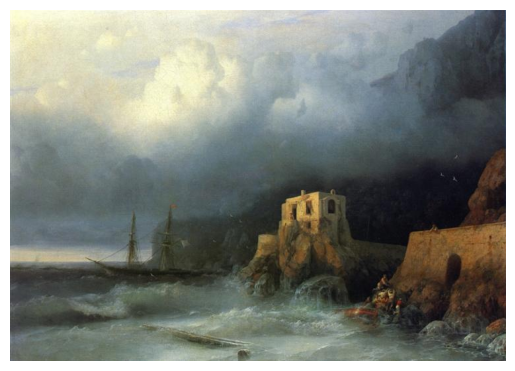

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt

IMAGE_BASE_DIRECTORY = 'drive/MyDrive/ScrapedWikiArtImages//img/'

img = Image.open(IMAGE_BASE_DIRECTORY + 'full/cb8de049156b174c9f94f6353e28cacbb8b27763.jpg')
plt.imshow(img)
plt.axis('off')
plt.show()

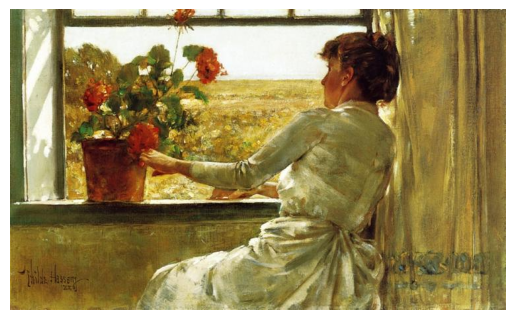

In [6]:
from PIL import Image
import matplotlib.pyplot as plt

IMAGE_BASE_DIRECTORY = 'drive/MyDrive/ScrapedWikiArtImages/img/'

img = Image.open(IMAGE_BASE_DIRECTORY + 'full/0a2cefc724850a07738602a3731797d2cd7da837.jpg')
plt.imshow(img)
plt.axis('off')
plt.show()